In [6]:
# 导入TextBlob
from textblob import TextBlob

In [14]:
# 词性标注
wiki = TextBlob("Shaoxing is a beautiful, cultural city.")
tag = wiki.tags
# 需要提前下载词库python -m textblob.download_corpora,否则会报错
print(tag)

[('Shaoxing', 'VBG'), ('is', 'VBZ'), ('a', 'DT'), ('beautiful', 'JJ'), ('cultural', 'JJ'), ('city', 'NN')]


In [12]:
# 分词和分句
blob = TextBlob("Beautiful is better than ugly. "
               "Explicit is better than implicit. "
               "Simple is better than complex.")
word = blob.words
sentence = blob.sentences
print(word)
print(sentence)

['Beautiful', 'is', 'better', 'than', 'ugly', 'Explicit', 'is', 'better', 'than', 'implicit', 'Simple', 'is', 'better', 'than', 'complex']
[Sentence("Beautiful is better than ugly."), Sentence("Explicit is better than implicit."), Sentence("Simple is better than complex.")]


In [114]:
# 名词短语列表
lists = wiki.noun_phrases
print(lists)

['shaoxing', 'cultural city']


In [16]:
# 词形还原和词干提取
# 单复数：singularize(）变单数，pluralize()变复数
# 用在对名词进行处理，且会考虑特殊名词单复数形式
sentence = TextBlob("Use 4 spaces per indentation level.")
word = sentence.words

danshu = word[2].singularize()  # space
print(danshu)
fushu = word[-1].pluralize()  # levels
print(fushu)

space
levels


In [17]:
# Word类
# lemmatize()方法对单词进行词形还原，名词找单数，动词找原型
# 既要处理名词，也要处理动词
from textblob import Word
w1 = Word("apples")
result1 = w1.lemmatize()  # 默认只处理名词 apple
w2 = Word("went")
result2 = w2.lemmatize("v")  # 对动词原型进行处理 go
print(result1, result2)

apple go


In [18]:
# WordNet获取近义词
from textblob.wordnet import VERB
result1 = Word("hack").synsets
result2 = Word("hack").get_synsets(pos=VERB)
# get_synsets():只查找该词作为动词时的集合，参数为空时和synsets方法相同
print("result1:", result1)
print("result2:", result2)

result1: [Synset('hack.n.01'), Synset('machine_politician.n.01'), Synset('hack.n.03'), Synset('hack.n.04'), Synset('cab.n.03'), Synset('hack.n.06'), Synset('hack.n.07'), Synset('hack.n.08'), Synset('chop.v.05'), Synset('hack.v.02'), Synset('hack.v.03'), Synset('hack.v.04'), Synset('hack.v.05'), Synset('hack.v.06'), Synset('hack.v.07'), Synset('hack.v.08')]
result2: [Synset('chop.v.05'), Synset('hack.v.02'), Synset('hack.v.03'), Synset('hack.v.04'), Synset('hack.v.05'), Synset('hack.v.06'), Synset('hack.v.07'), Synset('hack.v.08')]


In [19]:
# 获取近义词的定义
defi = result1[1].definition()
print(defi)

a politician who belongs to a small clique that controls a political party for private rather than public ends


In [21]:
# 获取单词本身的定义
defi = Word("octopus").definitions
print(defi)

['tentacles of octopus prepared as food', 'bottom-living cephalopod having a soft oval body with eight long tentacles']


In [24]:
# 拼写矫正
# 直接矫正
b = TextBlob("I havv goood speling!")
b_corr = b.correct()
print(b_corr)

I have good spelling!


In [25]:
# Word拼写检查
# word.spellcheck()方法，返回带有拼写建议的（word，confidence）元组列表
w = Word('falibility')
w_ = w.spellcheck()
print(w_)  # [('fallibility', 1.0)]

[('fallibility', 1.0)]


In [26]:
# 单词词频
monty = TextBlob("We are no longer the Knights who say Ni. "
                 "We are now the Knights who say Ekki ekki ekki PTANG.")
 
#（1）方式1
counts = monty.word_counts['ekki']  # 不区分大小写
print(counts)  # 3 
 
#（2）方式2
counts2 = monty.words.count('ekki')
print(counts2)  # 3
 
#（3）方式3
counts3 = monty.words.count('ekki', case_sensitive=True)   # 设置大小写敏感，默认不区分
print(counts3)  # 2

3
3
2


In [28]:
# 短语词频
counts4 = wiki.noun_phrases.count('shaoxing')   # 短语频次
print(counts4)

1


In [31]:
# 文本情感分析
from textblob import TextBlob
text1= "I am very happy today."
text2= "I am happy today."
text3= "I am sad today"
#创建TextBlob对象
blob1 = TextBlob(text1)
blob2 = TextBlob(text2)
blob3 = TextBlob(text3)
#输出TextBlob对象的情感极性
print("text1 sentiment:"+str(blob1.sentiment.polarity))
print("text2 sentiment:"+str(blob2.sentiment.polarity))
print("text3 sentiment:"+str(blob3.sentiment.polarity))

text1 sentiment:1.0
text2 sentiment:0.8
text3 sentiment:-0.5


In [33]:
# 词频
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
"My name is Xiaoming",
"His name is Xiaohong",
"Her name is Xiaodong",
"You are welcome"
]
# 将文本中的单词转换为词频矩阵
vectorizer = CountVectorizer()
# 计算各单词出现的次数
X = vectorizer.fit_transform(corpus)
# 获取文本中的所有词语
word = vectorizer.get_feature_names_out()
print(word)
# X[i][j]表示文本i中j词语的词频
print(X.toarray())

['are' 'her' 'his' 'is' 'my' 'name' 'welcome' 'xiaodong' 'xiaohong'
 'xiaoming' 'you']
[[0 0 0 1 1 1 0 0 0 1 0]
 [0 0 1 1 0 1 0 0 1 0 0]
 [0 1 0 1 0 1 0 1 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 1]]


In [35]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
# 将词频矩阵X计算成TF-IDF值
tfidf = transformer.fit_transform(X)
# tfidf[i][j]表示文本i中j词语的tf-idf权重
print(tfidf.toarray()) 

[[0.         0.         0.         0.38044393 0.59603894 0.38044393
  0.         0.         0.         0.59603894 0.        ]
 [0.         0.         0.59603894 0.38044393 0.         0.38044393
  0.         0.         0.59603894 0.         0.        ]
 [0.         0.59603894 0.         0.38044393 0.         0.38044393
  0.         0.59603894 0.         0.         0.        ]
 [0.57735027 0.         0.         0.         0.         0.
  0.57735027 0.         0.         0.         0.57735027]]


In [47]:
# 导入必要的python库
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import os
print(os.listdir("."))
import warnings
warnings.filterwarnings('ignore')

['IMDB Dataset.csv.zip', 'text_mining.ipynb', 'IMDB Dataset.csv', '.ipynb_checkpoints', 'word_count.py']


In [48]:
# 导入训练数据
imdb_data = pd.read_csv("IMDB Dataset.csv")
print(imdb_data.shape)
imdb_data.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [49]:
# 对于整个数据集的总结
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [50]:
# 好恶评论数统计
imdb_data["sentiment"].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [51]:
# 分割数据集
# 训练集
train_reviews=imdb_data.review[:40000]
train_sentiments=imdb_data.sentiment[:40000]
#test dataset
test_reviews=imdb_data.review[40000:]
test_sentiments=imdb_data.sentiment[40000:]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(40000,) (40000,)
(10000,) (10000,)


In [54]:
# 文本的归一化
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [55]:
# 文本数据清洗
# 删除html文本的固定字符以及噪声文本
# Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(denoise_text)

In [56]:
# 删除特殊字符
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_special_characters)

In [57]:
# 文本词干提取
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(simple_stemmer)

In [58]:
# 去除停用词
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_stopwords)

{'not', "couldn't", 'having', 'are', 'such', 'ain', 'and', 'what', 'hasn', "hasn't", 'me', "you're", 'herself', 'but', 'same', 'myself', 'there', "shouldn't", 'a', 'ma', "it's", 'theirs', 'or', "you'd", 'does', "should've", 've', 'why', 'both', 'now', "doesn't", 'as', 'by', 'where', 'in', 'be', 'don', 'do', 'were', 'of', 'after', 'then', 'most', "mustn't", 'ours', 'doesn', 'above', 'wasn', 'shan', 'been', 'whom', 'ourselves', 'own', 'shouldn', 'for', 'few', 'm', 'very', 'all', 'their', 'against', 'had', 'over', 'the', 'mightn', "you've", 'won', "haven't", 'doing', 'your', 'to', "needn't", 'from', 'out', 'yourselves', 'will', 'if', 'with', 't', "mightn't", 'between', 'she', 'at', 'his', 'before', 'under', 'so', 'he', 'itself', 'up', "you'll", 'our', 'aren', 'needn', 'have', 'which', 're', 'yourself', 'that', 'y', 'themselves', 's', 'this', 'isn', 'my', 'hers', 'than', 'can', 'haven', 'who', 'because', "isn't", 'too', "that'll", 'these', 'more', "wouldn't", 'o', 'about', "didn't", 'would

In [59]:
norm_train_reviews=imdb_data.review[:40000]
norm_train_reviews[0]
norm_test_reviews=imdb_data.review[40000:]
norm_test_reviews[45005]

'read review watch thi piec cinemat garbag took least 2 page find somebodi els didnt think thi appallingli unfunni montag wasnt acm humour 70 inde ani era thi isnt least funni set sketch comedi ive ever seen itll till come along half skit alreadi done infinit better act monti python woodi allen wa say nice piec anim last 90 second highlight thi film would still get close sum mindless drivelridden thi wast 75 minut semin comedi onli world semin realli doe mean semen scatolog humour onli world scat actual fece precursor joke onli mean thi handbook comedi tit bum odd beaver niceif pubesc boy least one hand free havent found playboy exist give break becaus wa earli 70 way sketch comedi go back least ten year prior onli way could even forgiv thi film even made wa gunpoint retro hardli sketch clown subtli pervert children may cut edg circl could actual funni come realli quit sad kept go throughout entir 75 minut sheer belief may save genuin funni skit end gave film 1 becaus wa lower scoreand

In [62]:
# 特征1:词袋模型
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0.0,max_df=1.0,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (40000, 6983231)
BOW_cv_test: (10000, 6983231)


In [63]:
# 特征2: TF-IDF
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0.0,max_df=1.0,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (40000, 6983231)
Tfidf_test: (10000, 6983231)


In [64]:
# 标注电影评论的好恶
#labeling the sentient data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(imdb_data['sentiment'])
print(sentiment_data.shape)

(50000, 1)


In [65]:
# 分割标注集
train_sentiments=sentiment_data[:40000]
test_sentiments=sentiment_data[40000:]
print(train_sentiments)
print(test_sentiments)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [66]:
# 使用支持向量机训练模型
#training the linear svm
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)
#fitting the svm for bag of words
svm_bow=svm.fit(cv_train_reviews,train_sentiments)
print(svm_bow)
#fitting the svm for tfidf features
svm_tfidf=svm.fit(tv_train_reviews,train_sentiments)
print(svm_tfidf)

SGDClassifier(max_iter=500, random_state=42)
SGDClassifier(max_iter=500, random_state=42)


In [67]:
# 评估模型性能
#Predicting the model for bag of words
svm_bow_predict=svm.predict(cv_test_reviews)
print(svm_bow_predict)
#Predicting the model for tfidf features
svm_tfidf_predict=svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

[0 0 0 ... 0 0 0]
[0 0 0 ... 1 0 0]


In [68]:
#Accuracy score for bag of words
svm_bow_score=accuracy_score(test_sentiments,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)
#Accuracy score for tfidf features
svm_tfidf_score=accuracy_score(test_sentiments,svm_tfidf_predict)
print("svm_tfidf_score :",svm_tfidf_score)

svm_bow_score : 0.8433
svm_tfidf_score : 0.8869


In [69]:
# 打印分类报告
#Classification report for bag of words 
svm_bow_report=classification_report(test_sentiments,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)
#Classification report for tfidf features
svm_tfidf_report=classification_report(test_sentiments,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.80      0.91      0.85      4993
    Negative       0.90      0.77      0.83      5007

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000

              precision    recall  f1-score   support

    Positive       0.90      0.88      0.89      4993
    Negative       0.88      0.90      0.89      5007

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [70]:
# 打印混淆举证
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,svm_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,svm_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[3878 1129]
 [ 438 4555]]
[[4497  510]
 [ 621 4372]]


<function matplotlib.pyplot.show(close=None, block=None)>

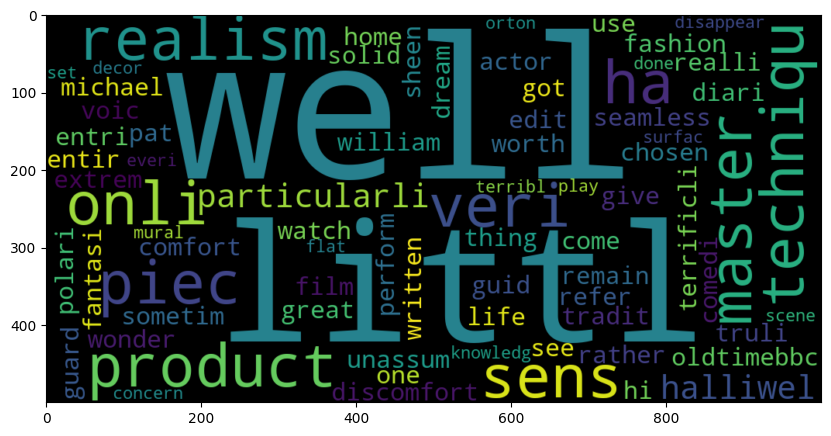

In [71]:
# 正向评论的词云
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

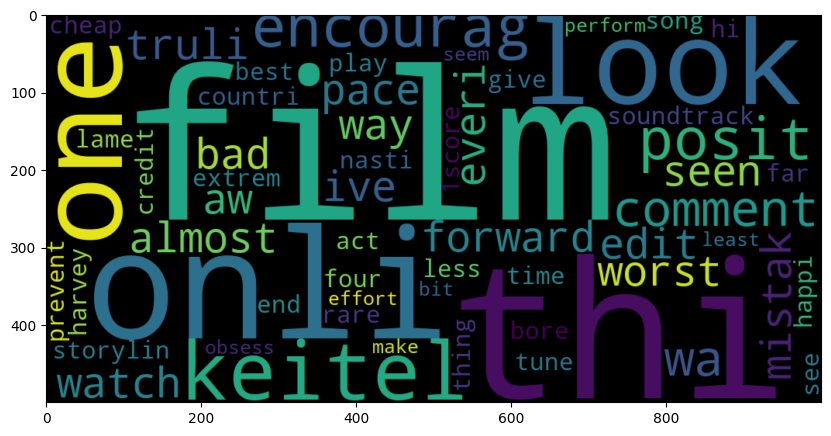

In [72]:
# 负面评论的词云
#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

In [2]:
# 获取红楼梦文本数据
with open("hlm.txt",'r',encoding='utf-8') as f:
    text = f.read()

In [5]:
# 统计词频
from collections import OrderedDict
import jieba
 
# 分词并统计词频
def wordFreq(text,topn):
    words = jieba.lcut(text.strip()) # 对文本进行分词操作
    counts = OrderedDict()
    for word in words:  # 统计每个词出现的频率，存放在字典counts中
        if len(word) == 1:  # 如果该词的长度为1，则跳过，不参与统计。
            continue
        counts[word] = counts.get(word,0) + 1
    items = []
    for key, value in counts.items():
        items.append([key, value])
    items.sort(key=lambda x:x[1],reverse=True)  # 按照词频进行排序
    f = open('HLM_词频.txt','w',encoding='utf-8')
    for i in range(topn):  # topn表示要取的词的个数，将频率最高的topn个词及其频率数存放在文件中
        word,count = items[i]
        print(word, count)
        f.writelines("{}\t{}\n".format(word,count))
    f.close() 
 
wordFreq(text,20)  # 这里我们提取出频率最高的前20个词

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/pj/hczh3nps5nd8tk8c6j0kr41w0000gn/T/jieba.cache
Loading model cost 0.240 seconds.
Prefix dict has been built successfully.


宝玉 3654
什么 1573
一个 1393
我们 1193
贾母 1190
那里 1149
凤姐 1088
王夫人 1003
你们 988
如今 980
说道 953
知道 948
老太太 946
这里 921
姑娘 917
起来 915
出来 909
他们 876
众人 829
太太 818


In [6]:
# 去除停用词
# 分词并统计词频
def wordFreq(text,topn):
    words = jieba.lcut(text.strip()) # 对文本进行分词操作
    # 加载停用词库
    stopwords = [line.strip() for line in open('stopwords.txt','r',encoding='utf-8').readlines()]
    counts = OrderedDict()
    for word in words:  # 统计每个词出现的频率，存放在字典counts中
        if len(word) == 1:  # 如果该词的长度为1，则跳过，不参与统计。
            continue
        elif word not in stopwords: # 如果该词不在停用词列表stopwords中，才参与统计
            counts[word] = counts.get(word,0) + 1
    items = []
    for key, value in counts.items():
        items.append([key, value])
    items.sort(key=lambda x:x[1],reverse=True)  # 按照词频进行排序
    f = open('HLM_词频.txt','w',encoding='utf-8')
    for i in range(topn):  # topn表示要取的词的个数，将频率最高的topn个词及其频率数存放在文件中
        word,count = items[i]
        print(word, count)
        f.writelines("{}\t{}\n".format(word,count))
    f.close()
wordFreq(text,20)  # 这里我们提取出频率最高的前20个词

宝玉 3654
贾母 1190
凤姐 1088
王夫人 1003
老太太 946
奶奶 766
贾琏 663
平儿 587
袭人 575
黛玉 548
宝钗 547
老爷 536
丫头 500
凤姐儿 448
薛姨妈 444
姐姐 434
鸳鸯 425
探春 420
二爷 394
贾政 345


In [7]:
# 去除停用词
# 分词并统计词频
def wordFreq(text,topn):
    words = jieba.lcut(text.strip()) # 对文本进行分词操作
    # 加载停用词库
    stopwords = [line.strip() for line in open('stopwords.txt','r',encoding='utf-8').readlines()]
    counts = OrderedDict()
    for word in words:  # 统计每个词出现的频率，存放在字典counts中
        if len(word) == 1:  # 如果该词的长度为1，则跳过，不参与统计。
            continue
        elif word not in stopwords: # 如果该词不在停用词列表stopwords中，才参与统计
            if word == '凤姐儿':
                word = '凤姐'
            elif word == '林黛玉' or word == '林妹妹':
                word = '黛玉'
            elif word == '二爷':
                word = '宝玉'
            counts[word] = counts.get(word,0) + 1
    items = []
    for key, value in counts.items():
        items.append([key, value])
    items.sort(key=lambda x:x[1],reverse=True)  # 按照词频进行排序
    f = open('HLM_词频.txt','w',encoding='utf-8')
    for i in range(topn):  # topn表示要取的词的个数，将频率最高的topn个词及其频率数存放在文件中
        word,count = items[i]
        f.writelines("{}\t{}\n".format(word,count))
    f.close()
wordFreq(text,20)  # 这里我们提取出频率最高的前20个词

<function matplotlib.pyplot.show(close=None, block=None)>

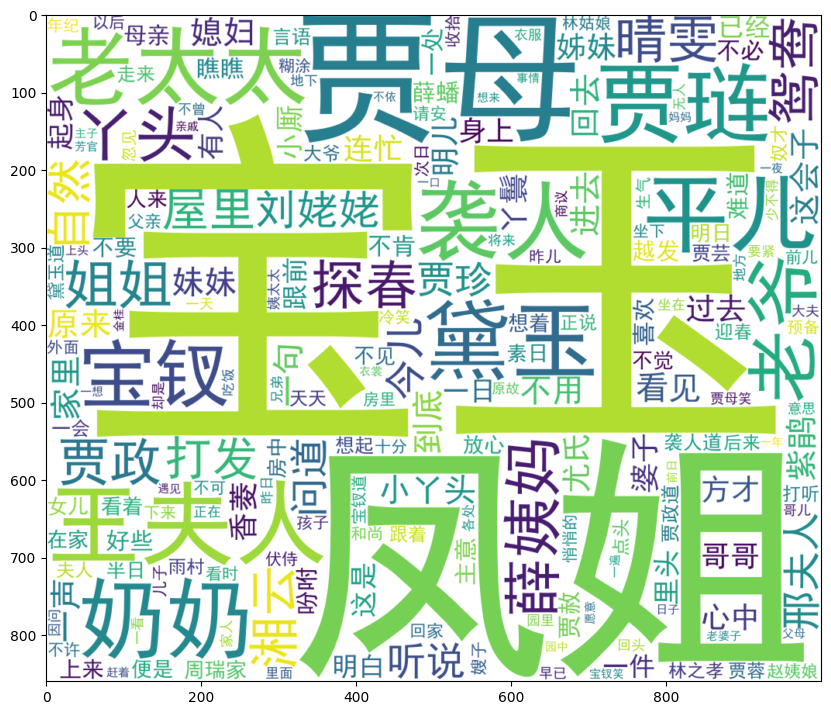

In [8]:
# 绘制词云
import matplotlib.pyplot as plt
import wordcloud
wordFreq(text,500)  # 获取TOP500的词频
word_cloud_text = open('HLM_词频.txt','r',encoding='utf-8').read()
plt.figure(figsize=(10,10))
wc = wordcloud.WordCloud(   font_path="SimHei.ttf",
                            background_color='white',
                            width=1000,
                            max_words=200,
                            height=860,
                            margin=2
                            ).generate(word_cloud_text)
plt.imshow(wc,interpolation='bilinear')
plt.show

In [9]:
# 章回处理
import re
chapter = re.findall('第[\u4e00-\u9fa5]+回',text)
lst_chapter = []
for x in chapter:  # 去除重复的章节
    if x not in lst_chapter and len(x)<=5:
        lst_chapter.append(x)
print(lst_chapter)

['第一回', '第二回', '第三回', '第四回', '第五回', '第六回', '第七回', '第八回', '第九回', '第十回', '第十一回', '第十二回', '第十三回', '第十四回', '第十五回', '第十六回', '第十七回', '第十八回', '第十九回', '第二十回', '第二十一回', '第二十二回', '第二十三回', '第二十四回', '第二十五回', '第二十六回', '第二十七回', '第二十八回', '第二十九回', '第三十回', '第三十一回', '第三十二回', '第三十三回', '第三十四回', '第三十五回', '第三十六回', '第三十七回', '第三十八回', '第三十九回', '第四十回', '第四十一回', '第四十二回', '第四十三回', '第四十四回', '第四十五回', '第四十六回', '第四十七回', '第四十八回', '第四十九回', '第五十回', '第五十一回', '第五十二回', '第五十三回', '第五十四回', '第五十五回', '第五十六回', '第五十七回', '第五十八回', '第五十九回', '第六十回', '第六十一回', '第六十二回', '第六十三回', '第六十四回', '第六十五回', '第六十六回', '第六十七回', '第六十八回', '第六十九回', '第七十回', '第七十一回', '第七十二回', '第七十三回', '第七十四回', '第七十五回', '第七十六回', '第七十七回', '第七十八回', '第七十九回', '第八十回', '第八十一回', '第八十二回', '第八十三回', '第八十四回', '第八十五回', '第八十六回', '第八十七回', '第八十八回', '第八十九回', '第九十回', '第九十一回', '第九十二回', '第九十三回', '第九十四回', '第九十五回', '第九十六回', '第九十七回', '第九十八回', '第九十九回', '第一零零回', '第一零一回', '第一零二回', '第一零三回', '第一零四回', '第一零五回', '第一零六回', '第一零七回', '第一零八回', '第一零九回', '第一一零回', '第一一一回', '第一一二回', '第一一三回', '第一一四回', '第一一五回', '

In [10]:
# 获取每一章回起始和结束的数据
lst_start_chapterIndex = []
for x in lst_chapter:  # 找出每一回在原文中的起始位置
    lst_start_chapterIndex.append(text.index(x))
 
lst_end_chapterIndex = lst_start_chapterIndex[1:]+[len(text)]  # 找出每一回在原文中的结束位置，本回的结束位置就是下一回的起始位置。最后一回的结束位置就是全文的结束。zip将每一回的起始和结束位置拼成一个元组，存放在lst_chapterindex列表中。
lst_chapterIndex = list(zip(lst_start_chapterIndex,lst_end_chapterIndex))
print(lst_chapterIndex)

[(11, 8066), (8066, 14154), (14154, 22837), (22837, 28897), (28897, 36984), (36984, 44422), (44422, 51910), (51910, 58616), (58616, 64296), (64296, 69437), (69437, 75397), (75397, 79712), (79712, 84940), (84940, 90612), (90612, 95704), (95704, 103346), (103346, 111187), (111187, 116756), (116756, 126041), (126041, 131384), (131384, 137548), (137548, 144736), (144736, 150353), (150353, 158936), (158936, 167189), (167189, 174594), (174594, 181152), (181152, 190800), (190800, 195378), (195378, 201209), (201209, 208401), (208401, 214279), (214279, 219081), (219081, 226411), (226411, 234304), (234304, 241067), (241067, 249254), (249254, 255371), (255371, 261660), (261660, 271118), (271118, 277689), (277689, 285306), (285306, 292066), (292066, 298825), (298825, 306664), (306664, 314978), (314978, 322287), (322287, 329028), (329028, 336445), (336445, 344095), (344095, 351207), (351207, 359558), (359558, 367725), (367725, 373131), (373131, 381279), (381279, 390048), (390048, 401327), (401327, 

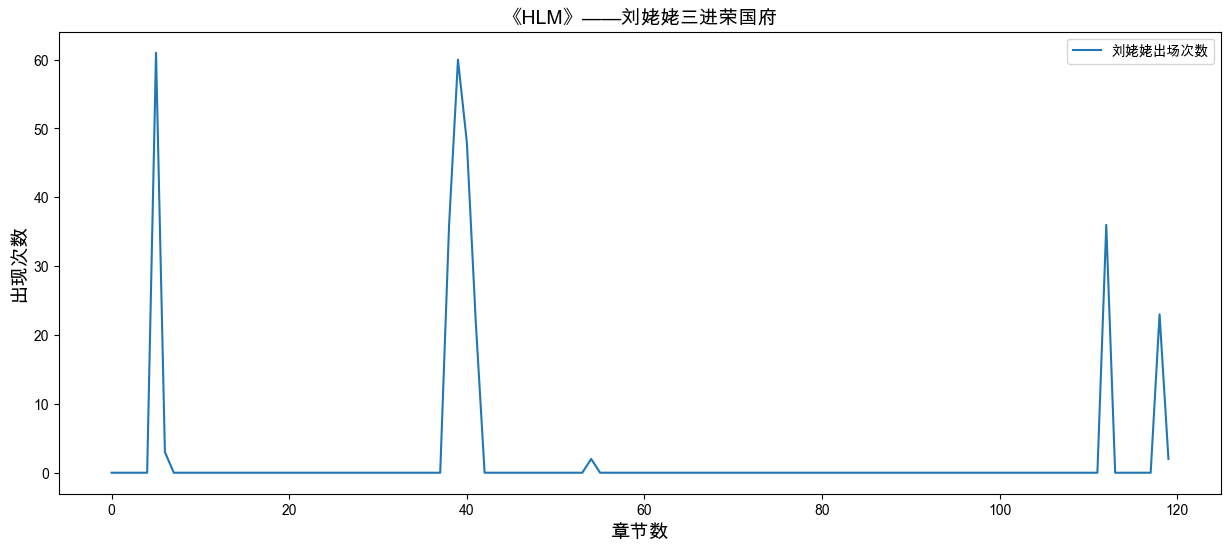

In [12]:
# 统计每一回中刘姥姥的出场次数并用折线图可视化
cnt_liulaolao = []
for i in range(120):
    start = lst_chapterIndex[i][0]
    end = lst_chapterIndex[i][1]
    cnt_liulaolao.append(text[start:end].count('刘姥姥'))
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] #解决中文显示，这是mac下的显示，windows下可能不需要这一行代码
plt.rcParams['axes.unicode_minus'] = False   #解决符号无法显示
plt.figure(figsize=(15,6))
plt.plot(range(120),cnt_liulaolao,label='刘姥姥出场次数')
plt.title('《HLM》——刘姥姥三进荣国府',fontdict={'fontsize':14})
plt.xlabel('章节数',fontdict={'fontsize':14})
plt.ylabel('出现次数',fontdict={'fontsize':14})
plt.legend()
plt.show()

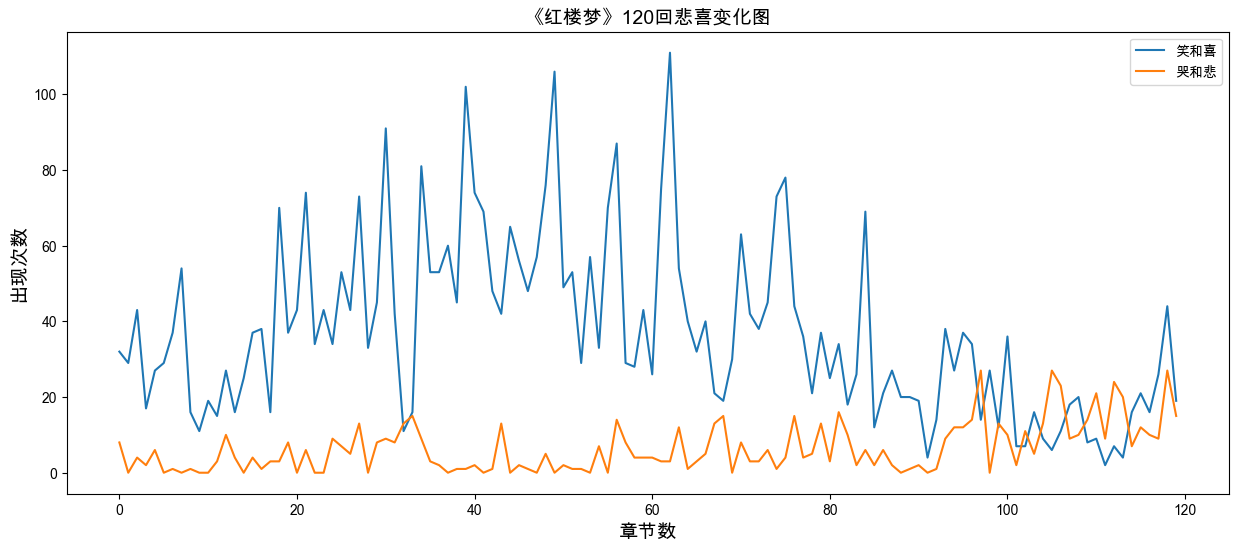

In [13]:
# 红楼梦中“哭说笑闹总关情”
# 统计情绪次数
cnt_laugh = []
cnt_cry = []
for i in range(120):
    start = lst_chapterIndex[i][0]
    end = lst_chapterIndex[i][1]
    cnt_laugh.append(text[start:end].count('笑')+text[start:end].count('喜'))
    cnt_cry.append(text[start:end].count('哭')+text[start:end].count('悲'))
# 可视化
plt.figure(figsize=(15,6))
plt.plot(range(120),cnt_laugh,label='笑和喜')
plt.plot(range(120),cnt_cry,label='哭和悲')
plt.title('《红楼梦》120回悲喜变化图',fontdict={'fontsize':14})
plt.xlabel('章节数',fontdict={'fontsize':14})
plt.ylabel('出现次数',fontdict={'fontsize':14})
plt.legend()
plt.show()

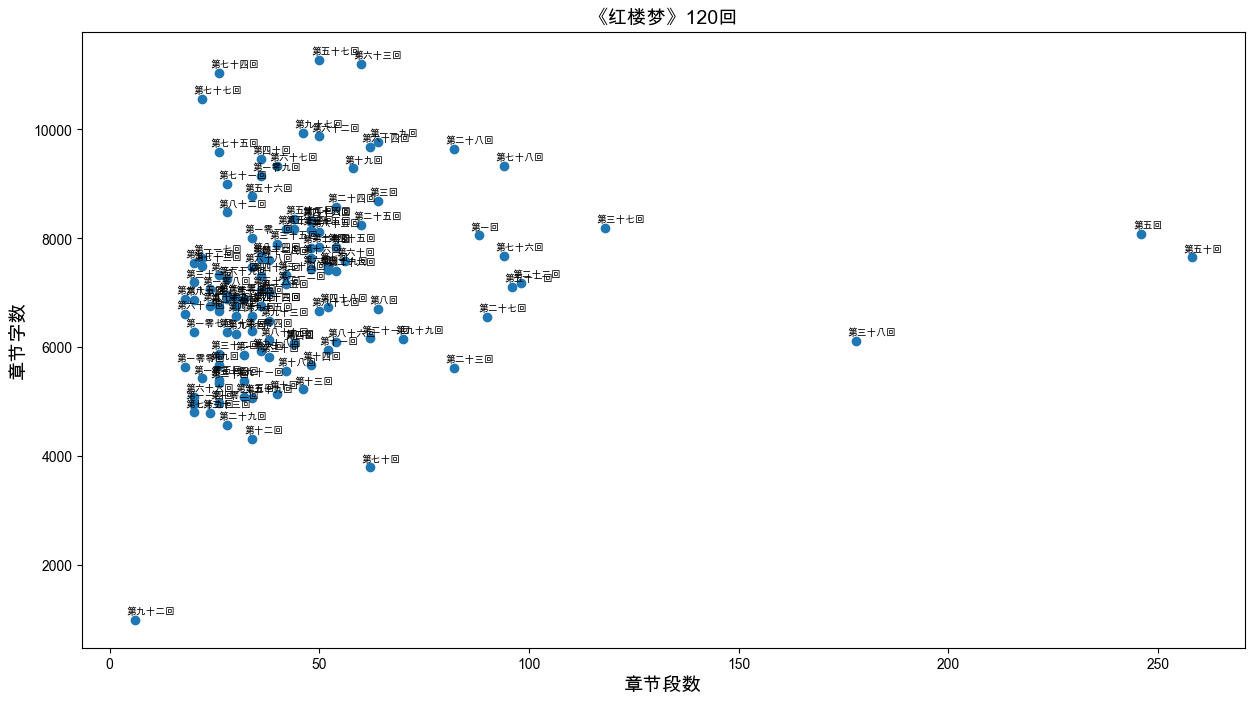

In [14]:
# 红楼梦平均段落数与字数
# 统计每一章段落数和字数并可视化
cnt_chap = []  # 存放每一回的段落数
cnt_word = []  # 存放每一回的字符总数
for i in range(120):
    start = lst_chapterIndex[i][0]
    end = lst_chapterIndex[i][1]
    cnt_chap.append(text[start:end].count('\n'))
    cnt_word.append(len(text[start:end]))
 
# 可视化
plt.figure(figsize=(15,8))
plt.scatter(cnt_chap,cnt_word)
for i in range(120):
    plt.text(cnt_chap[i]-2,cnt_word[i]+100,lst_chapter[i],size=7)
plt.xlabel('章节段数',fontdict={'fontsize':14})
plt.ylabel('章节字数',fontdict={'fontsize':14})
plt.title('《红楼梦》120回',fontdict={'fontsize':14})
plt.show()

In [15]:
# 红楼梦的人物社交关系
Names=['宝玉','凤姐','贾母','黛玉','王夫人','老太太','袭人','贾琏','平儿','宝钗','薛姨妈','探春','鸳鸯','贾政','晴雯','湘云','刘姥姥','邢夫人','贾珍','紫鹃','香菱','尤氏','薛蟠','贾赦']
relations = {}
lst_para = text.split('\n')  # 按段落划分，假设在同一段落中出现的人物具有共现关系
for t in lst_para:
    for name1 in Names:
        if name1 in t:
            for name2 in Names:
                if name2 in t and name1 != name2 and (name2,name1) not in relations:
                    relations[(name1,name2)] = relations.get((name1,name2),0)+1
print(relations.items())

dict_items([(('宝玉', '贾政'), 165), (('宝玉', '贾珍'), 54), (('宝玉', '贾赦'), 41), (('贾政', '贾珍'), 43), (('贾政', '贾赦'), 50), (('贾珍', '贾赦'), 34), (('黛玉', '老太太'), 100), (('贾母', '黛玉'), 130), (('贾母', '贾政'), 101), (('贾母', '贾赦'), 51), (('黛玉', '贾政'), 29), (('黛玉', '贾赦'), 9), (('贾母', '贾琏'), 72), (('黛玉', '贾琏'), 14), (('贾琏', '贾赦'), 38), (('贾母', '王夫人'), 242), (('贾母', '老太太'), 194), (('贾母', '邢夫人'), 77), (('黛玉', '王夫人'), 95), (('黛玉', '邢夫人'), 15), (('王夫人', '老太太'), 154), (('王夫人', '邢夫人'), 95), (('王夫人', '贾赦'), 38), (('老太太', '邢夫人'), 59), (('老太太', '贾赦'), 28), (('邢夫人', '贾赦'), 34), (('王夫人', '贾政'), 105), (('宝玉', '黛玉'), 299), (('宝玉', '王夫人'), 257), (('宝玉', '老太太'), 234), (('凤姐', '贾母'), 209), (('凤姐', '黛玉'), 89), (('凤姐', '王夫人'), 203), (('凤姐', '老太太'), 181), (('凤姐', '探春'), 50), (('贾母', '探春'), 60), (('黛玉', '探春'), 75), (('王夫人', '探春'), 52), (('老太太', '探春'), 51), (('宝玉', '贾母'), 284), (('宝玉', '探春'), 97), (('宝玉', '袭人'), 278), (('贾母', '袭人'), 90), (('黛玉', '袭人'), 80), (('贾母', '薛蟠'), 16), (('黛玉', '薛蟠'), 6), (('王夫人', '薛蟠'), 18), (('探春', '薛蟠

In [16]:
maxRela = max([v for k,v in relations.items()])
relations = {k:v/maxRela for k,v in relations.items()}
print(relations)

{('宝玉', '贾政'): 0.5518394648829431, ('宝玉', '贾珍'): 0.1806020066889632, ('宝玉', '贾赦'): 0.13712374581939799, ('贾政', '贾珍'): 0.14381270903010032, ('贾政', '贾赦'): 0.16722408026755853, ('贾珍', '贾赦'): 0.11371237458193979, ('黛玉', '老太太'): 0.33444816053511706, ('贾母', '黛玉'): 0.43478260869565216, ('贾母', '贾政'): 0.3377926421404682, ('贾母', '贾赦'): 0.1705685618729097, ('黛玉', '贾政'): 0.09698996655518395, ('黛玉', '贾赦'): 0.030100334448160536, ('贾母', '贾琏'): 0.2408026755852843, ('黛玉', '贾琏'): 0.046822742474916385, ('贾琏', '贾赦'): 0.12709030100334448, ('贾母', '王夫人'): 0.8093645484949833, ('贾母', '老太太'): 0.6488294314381271, ('贾母', '邢夫人'): 0.25752508361204013, ('黛玉', '王夫人'): 0.3177257525083612, ('黛玉', '邢夫人'): 0.05016722408026756, ('王夫人', '老太太'): 0.5150501672240803, ('王夫人', '邢夫人'): 0.3177257525083612, ('王夫人', '贾赦'): 0.12709030100334448, ('老太太', '邢夫人'): 0.19732441471571907, ('老太太', '贾赦'): 0.09364548494983277, ('邢夫人', '贾赦'): 0.11371237458193979, ('王夫人', '贾政'): 0.3511705685618729, ('宝玉', '黛玉'): 1.0, ('宝玉', '王夫人'): 0.85953177257

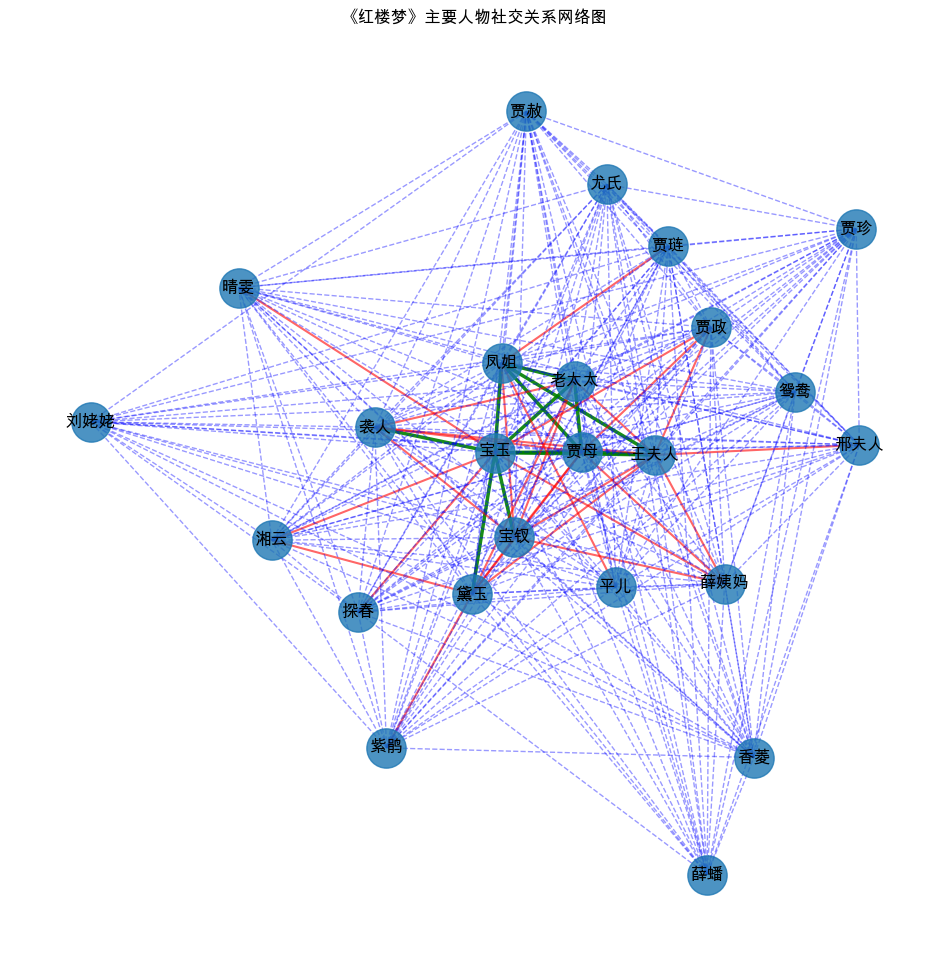

In [18]:
import networkx as nx
plt.figure(figsize=(12,12))
G= nx.Graph()
# 根据relations的数据向G中添加边
for k,v in relations.items():
    G.add_edge(k[0],k[1],weight=v)
elarge = [(u,v)for (u,v,d) in G.edges(data=True) if d['weight']>0.6]
emidle = [(u,v)for (u,v,d) in G.edges(data=True) if (d['weight']>0.3)&(d['weight']<=0.6)]
esmall = [(u,v)for (u,v,d) in G.edges(data=True) if d['weight']<=0.3]
# 设置图形布局
pos = nx.spring_layout(G)
# 设置节点样式
nx.draw_networkx_nodes(G,pos,alpha=0.8,node_size=800)
nx.draw_networkx_edges(G,pos,edgelist=elarge,width=2.5,alpha=0.9,edge_color='g')
nx.draw_networkx_edges(G,pos,edgelist=emidle,width=1.5,alpha=0.6,edge_color='r')
nx.draw_networkx_edges(G,pos,edgelist=esmall,width=1,alpha=0.4,edge_color='b',style='dashed')
nx.draw_networkx_labels(G,pos,font_size=12)
plt.axis('off')
plt.title('《红楼梦》主要人物社交关系网络图')
plt.show()

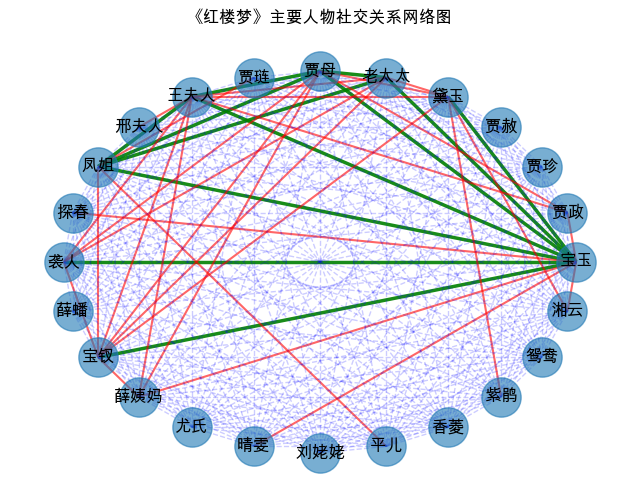

In [19]:
plt.figure(figsize=(8,6))
pos = nx.circular_layout(G)
# 设置节点样式
nx.draw_networkx_nodes(G,pos,alpha=0.6,node_size=800)
nx.draw_networkx_edges(G,pos,edgelist=elarge,width=2.5,alpha=0.9,edge_color='g')
nx.draw_networkx_edges(G,pos,edgelist=emidle,width=1.5,alpha=0.6,edge_color='r')
nx.draw_networkx_edges(G,pos,edgelist=esmall,width=1,alpha=0.2,edge_color='b',style='dashed')
nx.draw_networkx_labels(G,pos,font_size=12)
plt.axis('off')
plt.title('《红楼梦》主要人物社交关系网络图')
plt.show()